In [1]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import leidenalg 
import igraph as ig
import networkx as nx

In [2]:
def get_pos(txt_file):
    coordinates = np.loadtxt(txt_file, delimiter = ' ')
    coordinates = coordinates[:,:2]
    return dict(zip(range(coordinates.shape[0]), coordinates))

In [3]:
G_LS174T = ig.Graph.Read_Edgelist('../data/Edgelist/LS174T_clean_EdgesList.txt', directed=True)
G_SW1222 = ig.Graph.Read_Edgelist('../data/Edgelist/SW1222_clean_EdgesList.txt', directed=True)
G_Mes = ig.Graph.Read_Edgelist('../data/Edgelist/Mesentery_clean_EdgeList.txt', directed=True)

In [6]:
part_LS = leidenalg.find_partition(G_LS174T, leidenalg.ModularityVertexPartition)
part_SW = leidenalg.find_partition(G_SW1222, leidenalg.ModularityVertexPartition)
part_Mes = leidenalg.find_partition(G_Mes, leidenalg.ModularityVertexPartition)

In [27]:
lens_LS = [float(len(comm))/sum([len(comm) for comm in part_LS]) for comm in part_LS]
lens_SW = [float(len(comm))/sum([len(comm) for comm in part_SW]) for comm in part_SW]
lens_Mes = [float(len(comm))/sum([len(comm) for comm in part_Mes]) for comm in part_Mes]

<function matplotlib.pyplot.show>

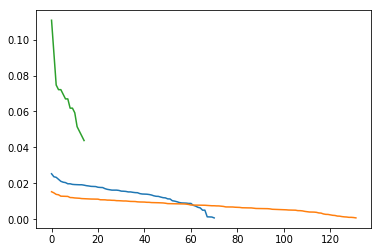

In [28]:
plt.plot(lens_LS)
plt.plot(lens_SW)
plt.plot(lens_Mes)
plt.show

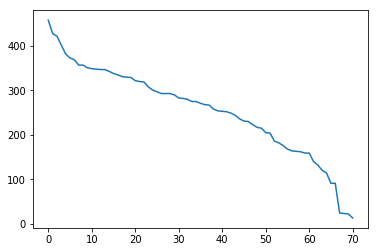

In [21]:
pd.Series(lens_LS).plot()

In [22]:
nidx2clust = [0]*18093
for i,x in enumerate(part):
    for y in x:
        nidx2clust[y] = i

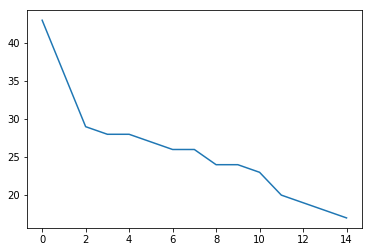

In [23]:
lens = [len(comm) for comm in part_Mes]
pd.Series(lens).plot()

In [24]:
nidx2clust_mes = [0]*388
for i,x in enumerate(part_Mes):
    for y in x:
        nidx2clust_mes[y] = i

In [ ]:
G_Mes_nx = nx.read_edgelist("../data/Edgelist/Mesentery_clean_EdgeList.txt", nodetype=int)
pos = nx.spring_layout(G_Mes_nx)
nx.draw(G_Mes_nx, node_color=nidx2clust_mes, pos = pos, node_size=40, cmap=plt.cm.Paired)

In [7]:
nidx2clust_LS = [0]*G_LS174T.vcount()
for i,x in enumerate(part_LS):
    for y in x:
        nidx2clust_LS[y] = i

In [8]:
nidx2clust_SW = [0]*G_SW1222.vcount()
for i,x in enumerate(part_SW):
    for y in x:
        nidx2clust_SW[y] = i

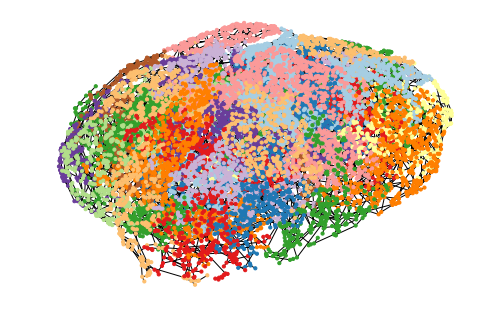

In [9]:
G_LS174T_nx = nx.read_edgelist("../data/Edgelist/LS174T_clean_EdgesList.txt", nodetype=int)
LS174T_pos = get_pos('../data/og_files/LS174T_coordinates.txt')
# print(LS174T_pos)
nx.draw(G_LS174T_nx, node_color=np.asarray(nidx2clust_LS), pos = LS174T_pos, node_size=10, cmap=plt.cm.Paired)

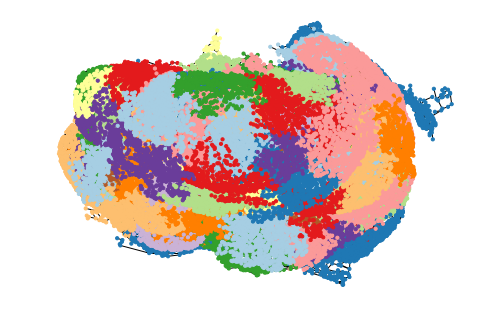

In [11]:
G_SW1222_nx = nx.read_edgelist("../data/Edgelist/SW1222_clean_EdgesList.txt", nodetype=int)
SW1222_pos = get_pos('../data/og_files/SW1222_coordinates.txt')
# print(LS174T_pos)
nx.draw(G_SW1222_nx, node_color=np.asarray(nidx2clust_SW), pos = SW1222_pos, node_size=10, cmap=plt.cm.Paired)